# Pandas 시각화
- 형식) object.plot(kind=chart)
- object : Series or DataFrame
-  kind  : bar, barh, pie, hist, kde, box, scatter

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# 1. Series 객체 시각화

0    -1.508036
10    1.525522
20   -1.023788
30   -1.190696
40   -0.160664
50   -0.804255
60    1.226408
70   -0.575595
80    0.622094
90    0.112070
dtype: float64


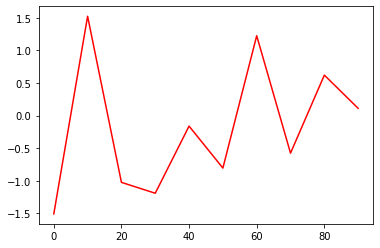

In [3]:
ser = pd.Series(np.random.randn(10), index=np.arange(0,100,10))
print(ser)

ser.plot(color='r') # 기본차트 : 선그래프


# 2. DataFrame 객체 시각화

        one       two     three      four
0 -0.002360 -0.686208 -1.038224  0.103453
1  0.282690 -0.394245  0.508847  0.345780
2  0.033990  0.946396 -1.778983  1.997042
3 -0.060528  0.243220 -0.310992 -1.246547
4 -0.401773 -0.643985  0.078180  0.193263
5 -0.094570  2.488027  0.269251 -0.179542
6  0.859392  0.516365  1.662088  1.821784
7  1.174397 -1.227863  0.139461 -2.200656
8 -0.764560 -0.524494 -0.803742  0.238752
9  1.297397 -0.638301 -0.155841  0.362557


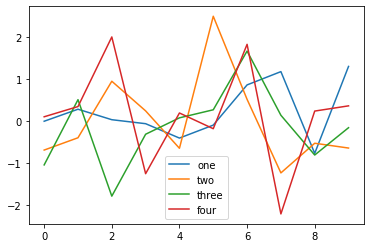

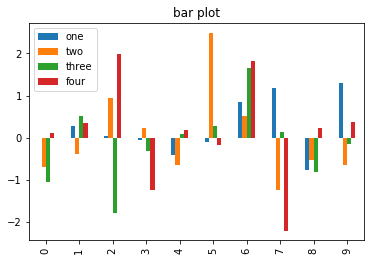

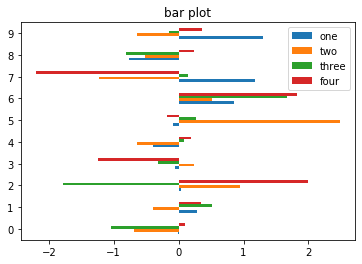

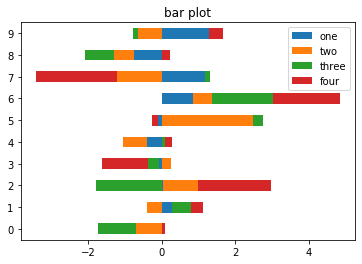

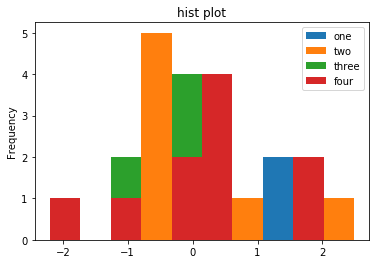

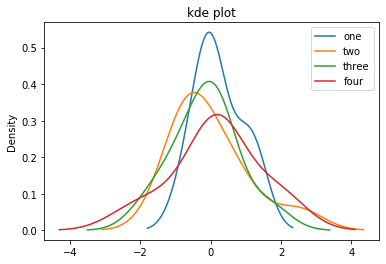

In [4]:
df = pd.DataFrame(np.random.randn(10,4), columns=['one','two','three','four'])
print(df)

# line 차트
df.plot() 
# 세로 막대차트
df.plot(kind='bar',title='bar plot')
# 가로 막대차트
df.plot(kind='barh',title='bar plot')
# 가로 막대차트 : 누적형
df.plot(kind='barh',title='bar plot', stacked=True)
# 도수분포(히스토그램)
df.plot(kind='hist', title='hist plot')
# 커널밀도추정 : kde
df.plot(kind='kde', title='kde plot')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB
size  1   2   3   4  5  6
day                      
Fri   1  16   1   1  0  0
Sat   2  53  18  13  1  0
Sun   0  39  15  18  3  1
Thur  1  48   4   5  1  3


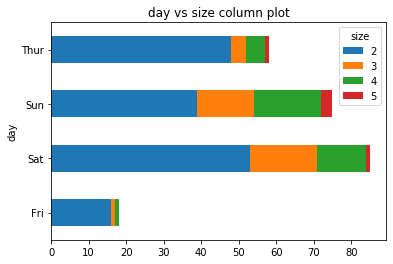

In [6]:

##### tips.csv 적용 #####
tips = pd.read_csv('C:/IITT/4_Python-II/workplace/data/tips.csv')
tips.info()

tips.head()

# 요일(day) vs 파티규모(size) 범주 확인
tips['day'].unique() #['Sun', 'Sat', 'Thur', 'Fri']
tips['size'].unique() # [2, 3, 4, 1, 6, 5]

# 교차분할표 : 2개 집단변수 이용
tab = pd.crosstab(tips['day'], tips['size'])
print(tab)
'''
size  1   2   3   4  5  6
day                      
Fri   1  16   1   1  0  0
Sat   2  53  18  13  1  0
Sun   0  39  15  18  3  1
Thur  1  48   4   5  1  3
'''

type(tab)

tab_result = tab.loc[:,2:5]
tab_result

tab_result.plot(kind='barh',title='day vs size column plot', stacked=True)


# 3. 산점도 matrix

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E254D15DC8>,
      dtype=object)

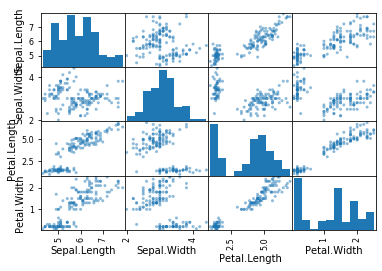

In [8]:
from pandas import plotting

iris = pd.read_csv('C:/IITT/4_Python-II/workplace/data/iris.csv')
iris.info()
cols = list(iris.columns)
iris_x = iris[cols[:4]]

plotting.scatter_matrix(iris_x)

# 4. 3d 산점도 matrix

AttributeError: module 'matplotlib.pyplot' has no attribute 'zlabel'

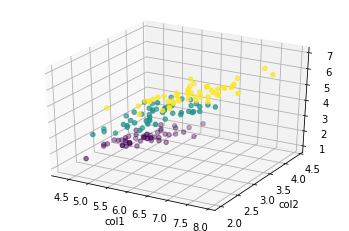

In [9]:
from mpl_toolkits.mplot3d import Axes3D

col1 = iris[cols[0]]
col2 = iris[cols[1]]
col3 = iris[cols[2]]

cdata = []
for s in iris['Species']:
    if s == 'setosa':
        cdata.append(1)
    elif s == 'versicolor':
        cdata.append(2)
    else:
        cdata.append(3)
        
fig = plt.figure()
chart = fig.add_subplot(1,1,1,projection='3d')

# (x,y,z,color)
chart.scatter(col1,col2,col3,c=cdata) #(x,y,z)
plt.xlabel('col1') # chart.set_xlabel('col1)
plt.ylabel('col2')
plt.zlabel('col3')
